In [1]:
from IPython.display import display
from widgets import interactive_density_widget, interactive_composite_widget
from colormaps import CustomColormaps
from misc import display_density_histogram


## Density preview

#### Value histogram

The following plot shows the cumulative density map value histogram. The red dot indicates the minimum density value to use in the colormap range if we want to ignore the lower `0.1` percentile of the density map.
 

Minimum density : rho_min = 0.0560673 ; log(rho_min) = -1.25129


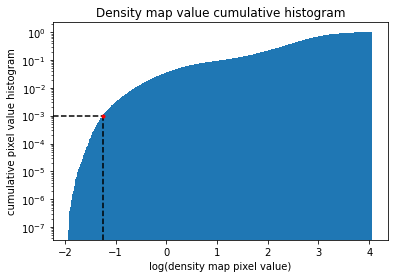

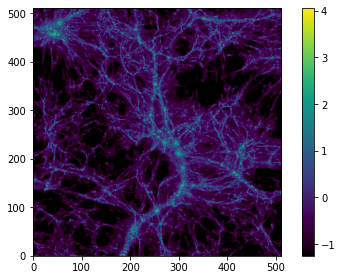

In [2]:
display_density_histogram(drop_percentile=0.1)

## Colormap suggestion

Suggested colormaps are displayed below, some standard matplotlib colormaps, others are custom-made. All but the last 5 are perceptually uniform sequential colormaps.

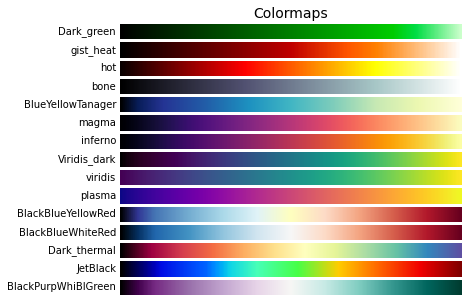

In [3]:
CustomColormaps.show_colormaps(["Dark_green", "gist_heat", "hot", "bone", "BlueYellowTanager", "magma", "inferno", "Viridis_dark", "viridis", "plasma", "BlackBlueYellowRed", "BlackBlueWhiteRed", "Dark_thermal", "JetBlack", "BlackPurpWhiBlGreen"], sort=False)

In [6]:
w = interactive_density_widget(min_pct=0.0, default_pct=1.0, max_pct=4.0)
display(w)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='dropped percentile (rho)', …

## Interactive image composite

The following widget lets you mix different channels interactively to create a composite image with various colormaps, value ranges. It is based on 4 different ray-traced maps :

 * mass-weighted entropy
 * mass-weighted density
 * mass-weighted temperature
 * mass-weighted metallicity

In [5]:
wc = interactive_composite_widget(min_pct=0.0, default_pct=1.0, max_pct=6.0)
display(wc)

interactive(children=(Dropdown(description='Density colormap', index=7, options=('Dark_green', 'gist_heat', 'h…